### Import all the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Read the data set using pandas

In [3]:
data = pd.read_csv('D:\My World\Machine Learning\Supervised learning\Regression\Linear Regression\Salary_Data.csv')

### Understanding Data 
- data.head()
- data.info()
- data.describe() 
- data.isnul().sum()

In [4]:
data.head()#Check the first 5 rows

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
#Checking information about the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
#Count null values
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Plot the data 

In [8]:
# Using the plots to help us explain the values and how they are scattered

c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1200x600 with 0 Axes>

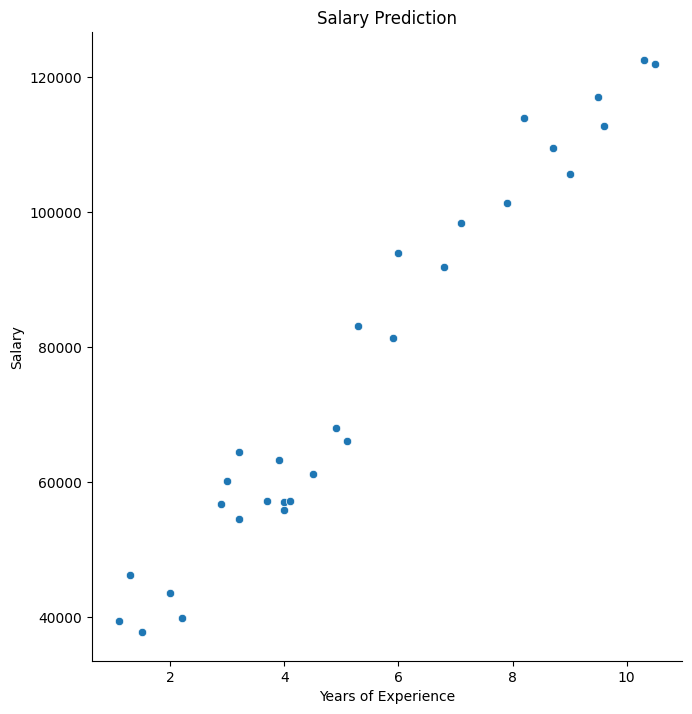

In [9]:
plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars= ['YearsExperience'],
             y_vars= ['Salary'],size=7,kind='scatter')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Prediction')

plt.show()


### Data preprocessing

In [10]:
# #Cooking data 
# X = data['YearsExperience']
# X.head()


In [11]:
# y = data['Salary']
# y.head()

In [12]:
import numpy as np
#converting from 1D to 2D
# When I didn't add the new axis, or change the dimension in general
# I cannot fit the samples to the model as sklearn only takes in 2d array
X = data['YearsExperience'].to_numpy().reshape(-1, 1)
y = data['Salary'].to_numpy().reshape(-1, 1)

In [13]:
#Import segregating data form scikit learn
import sklearn
from sklearn.model_selection import train_test_split

In [14]:
#Split the data for train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [15]:
#Import Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [16]:
# Fitting the model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [17]:
#Predicting the salary for the test values
y_pred = lr.predict(X_test)

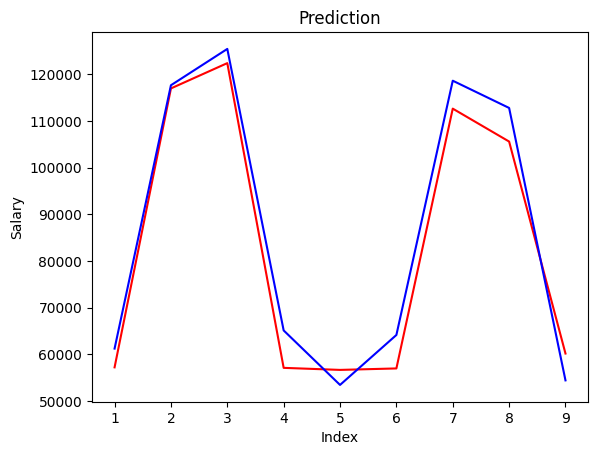

In [18]:
c = [i for i in range (1,len(y_test)+1,1)]
#The expression c = [i for i in range(1, len(y_test)+1, 1)] creates a
# list of integers from 1 to the length of y_test, 
# where each integer is incremented by 1.
plt.plot(c,y_test,color='r', linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.title('Prediction')
plt.show()

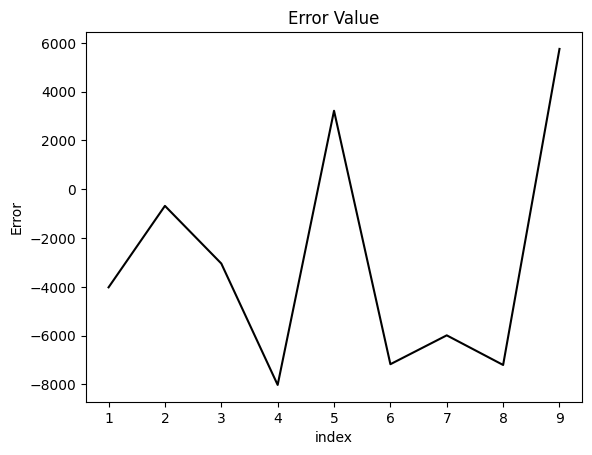

In [19]:
# plotting the error
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c, y_test-y_pred, color='black', linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.show()

In [20]:
#Intercept and coefficient of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: [25202.88778615]
Coefficient of the line: [[9731.20383825]]


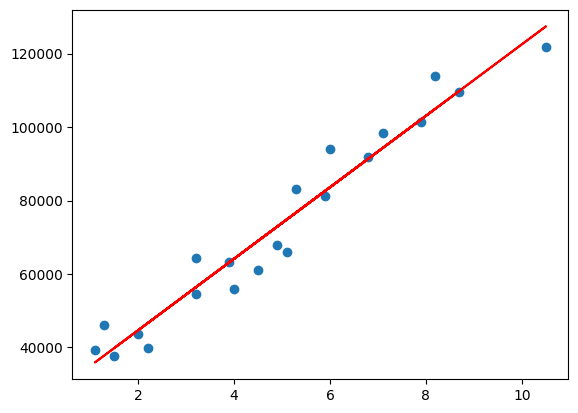

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.intercept_ + lr.coef_*X_train, 'r')
plt.show()

### Line of best fit

y = 9731.2x + 25202.9